# BEATS raytracing: Optics - DMM substrates surface error
Raytrcing calculations for the BEATS DMM
### Si substrates: interferometry surface data from manufacturer
* [W/B4C]$_{100}$ stripe @ 45 keV 
* Beam snapshots from ShadowOUI are compared at sample position (42m)
* Interferometry data from SESO used to simulate real ML profiles 
* The comparison is done with MLs on ideal substrates with no surface error
* All MLs have the same roughness (~30 nm) (the current substrate roughness is < 14 nm!)
* Second ML Optical Element Rotation around Z: 180deg
* No d-spacing gradient

______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   06/09/2020

Last update:  26/11/2022
______________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from pandas_ods_reader import read_ods
import h5py
from scipy.constants import c, h

In [67]:
matplotlib.rcParams['figure.dpi'] = 300

In [2]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

#### Plot Z-profiles of the beam center @ 42 m (from Shadow)

In [40]:
source_plots_dir = '/home/gianthk/git/BEATS_raytracing/DMM/figures/slope_error/'
WB4C_45keV_SESO_Zprofile = np.load(source_plots_dir + 'WB4C_d30_d-spacing_NOgradient_45keV_SESO_OEZrot_180deg_Zprofile_c0t40.npy')
WB4C_45keV_flat_Zprofile = np.load(source_plots_dir + 'WB4C_d30_d-spacing_NOgradient_45keV_idealflat_OEZrot_180deg_Zprofile_c0t40.npy')

In [42]:
x_flat=np.zeros(len(WB4C_45keV_flat_Zprofile))
y_flat=np.zeros(len(WB4C_45keV_flat_Zprofile))
x_SESO=np.zeros(len(WB4C_45keV_SESO_Zprofile))
y_SESO=np.zeros(len(WB4C_45keV_SESO_Zprofile))
a=0
for point in WB4C_45keV_SESO_Zprofile:
    x_SESO[a] = point[0]
    y_SESO[a] = point[1]
    a += 1
    
a=0
for point in WB4C_45keV_flat_Zprofile:
    x_flat[a] = point[0]
    y_flat[a] = point[1]
    a += 1

[(-3.5, 3.5), (-10.0, 15.0)]

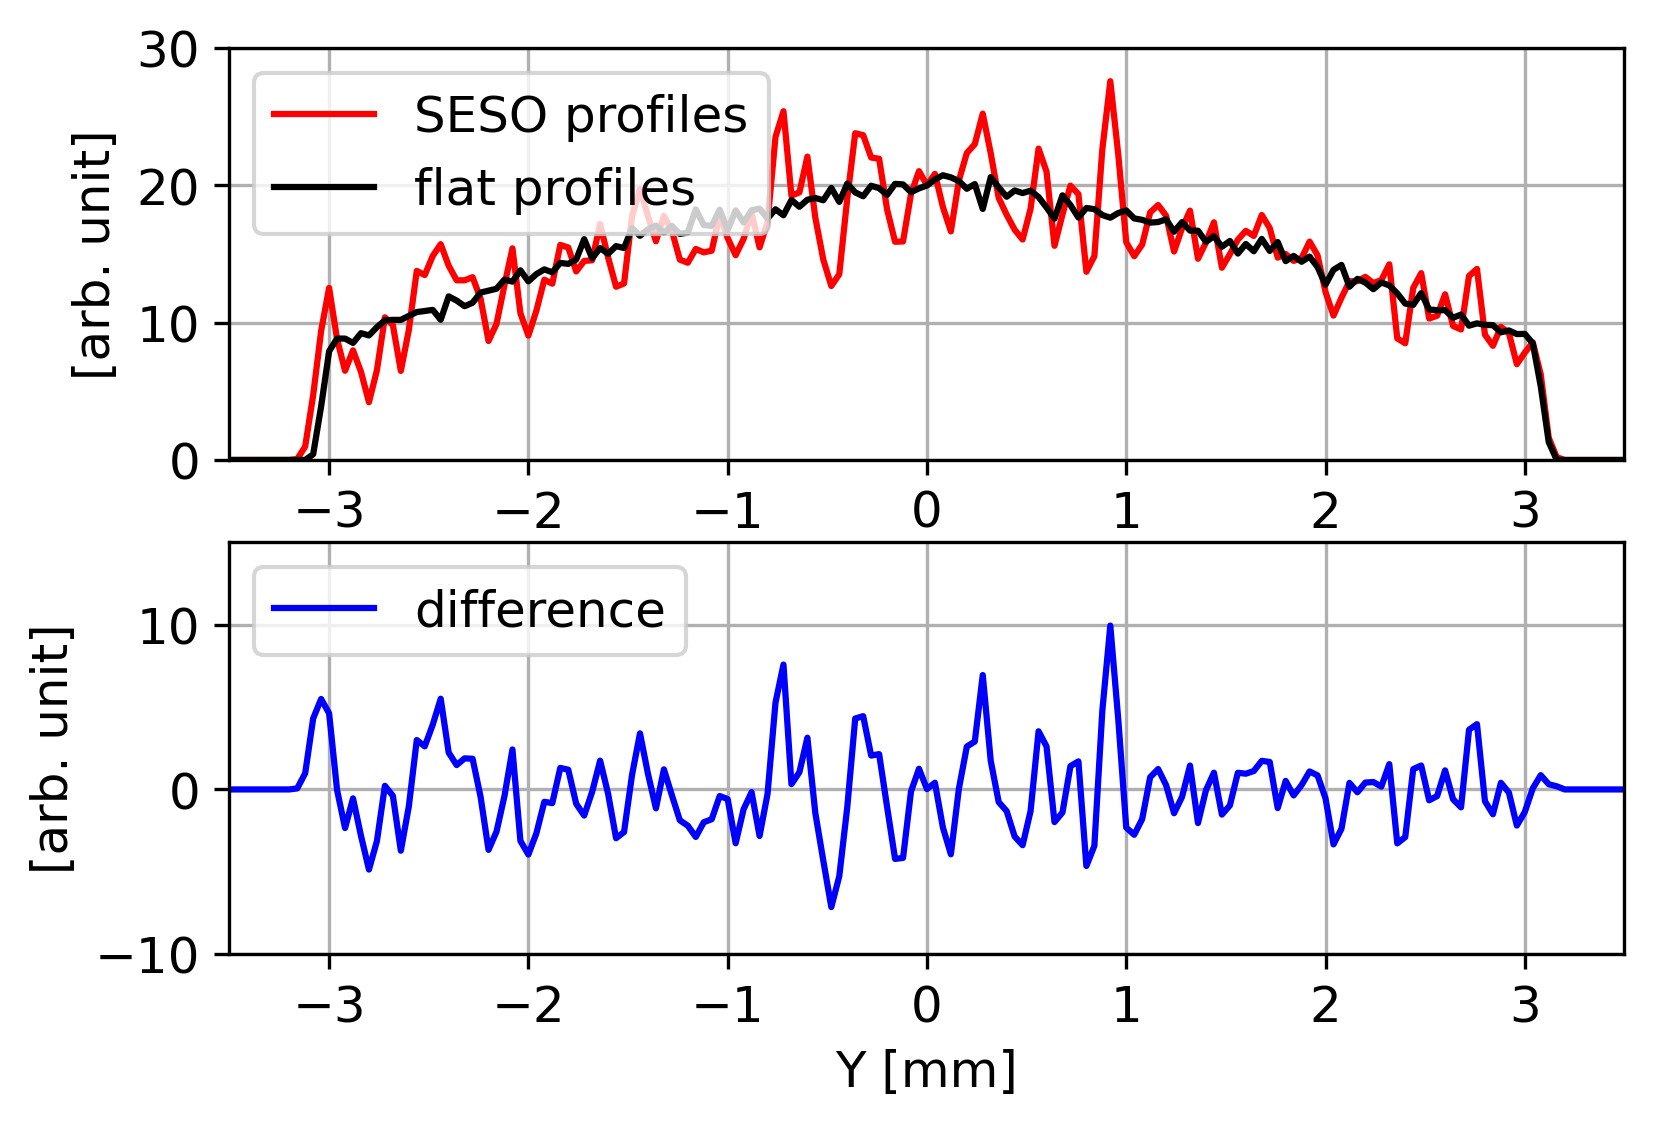

In [69]:
f, ax = plt.subplots()
n=30
ax1=plt.subplot(2,1,1)
plt.plot(x_SESO*1e-3, y_SESO, 'r')
plt.xlabel('Y [mm]')
plt.ylabel('[arb. unit]')
plt.grid(True, which="both")
ax1.set(xlim=(-3.5, 3.5), ylim=(0, 30))

plt.plot(x_flat*1e-3, y_flat, 'k')
plt.xlabel('Y [mm]')
plt.ylabel('[arb. unit]')
plt.grid(True, which="both")
plt.legend(["SESO profiles", "flat profiles"], loc='upper left')

ax2=plt.subplot(2,1,2)
plt.plot(x_flat*1e-3, y_SESO-y_flat, 'b')
plt.xlabel('Y [mm]')
plt.ylabel('[arb. unit]')
plt.grid(True, which="both")
plt.legend(["difference"], loc='upper left')
ax2.set(xlim=(-3.5, 3.5), ylim=(-10, 15))

#### Read ad plot beam profiles @ 42 m (from Shadow)

In [55]:
import silx.io

In [57]:
WB4C_45keV_SESO_profile = silx.io.open(source_plots_dir + 'WB4C_d30_d-spacing_NOgradient_45keV_SESO_OEZrot_180deg.hdf5')
WB4C_45keV_flat_profile = silx.io.open(source_plots_dir + 'WB4C_d30_d-spacing_NOgradient_45keV_idealflat_OEZrot_180deg.hdf5')

In [62]:
print(WB4C_45keV_SESO_profile["entry/data0"])

<HDF5 group "/entry/data0" (4 members)>


Text(0, 0.5, 'Y [mm]')

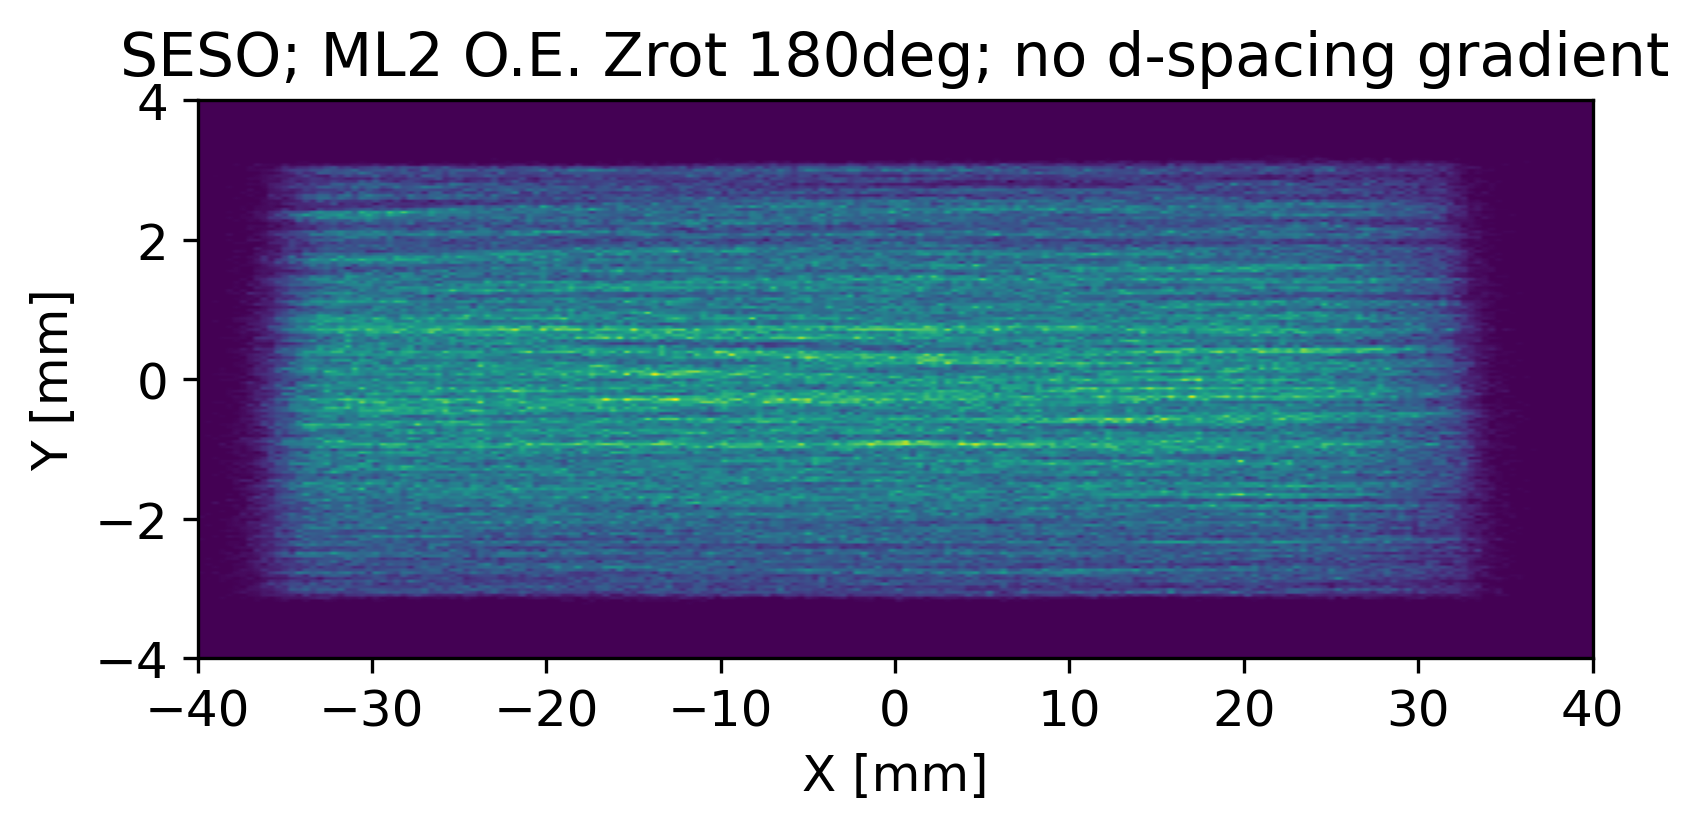

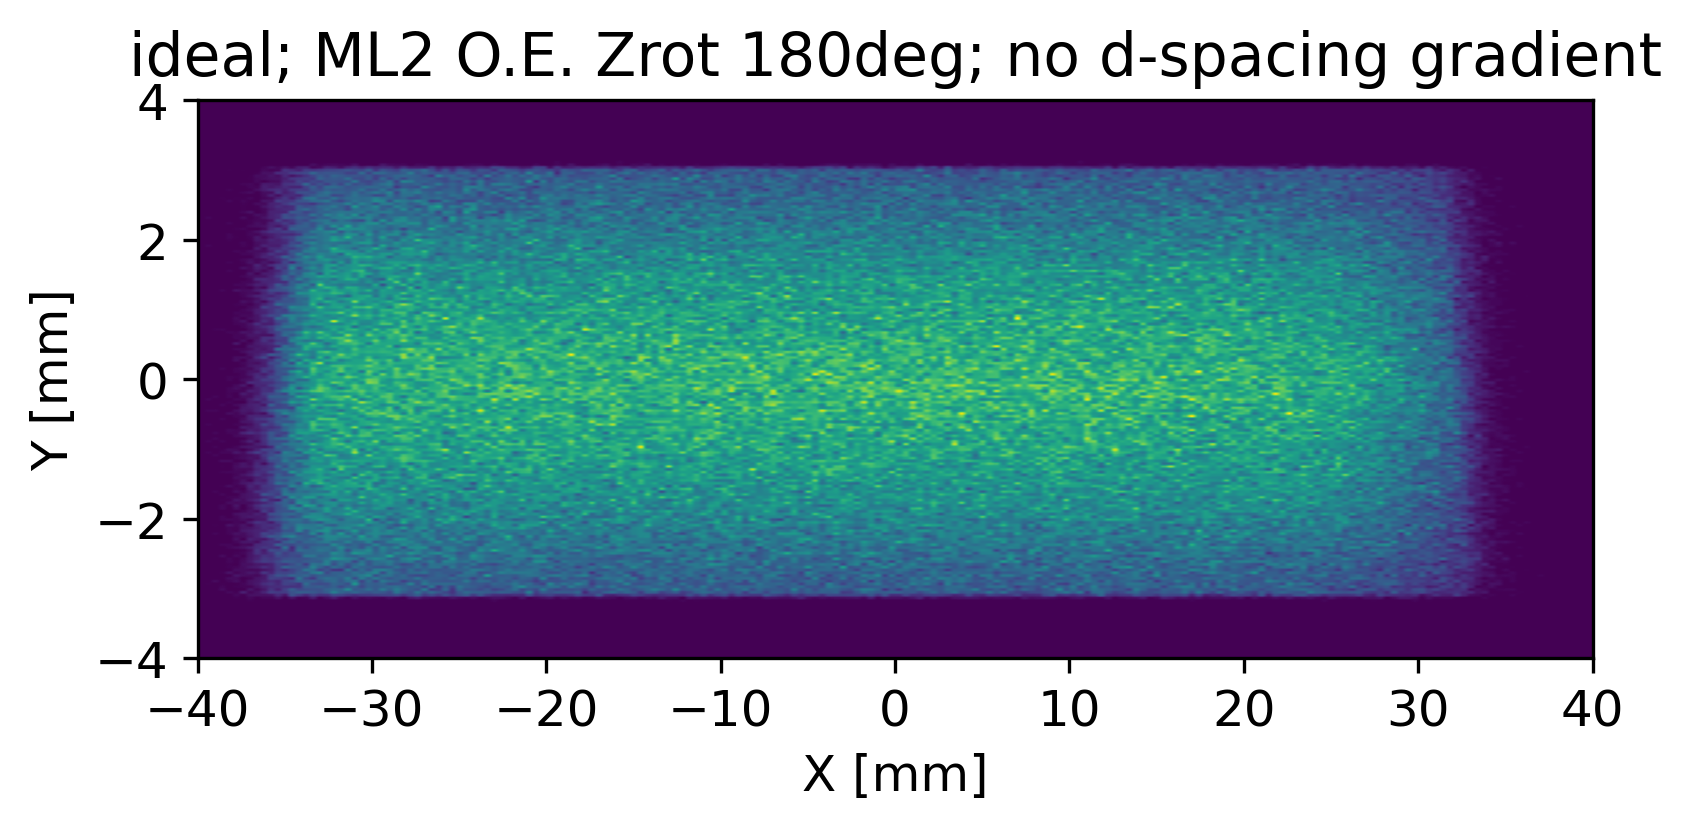

In [88]:
f, ax = plt.subplots()
plt.imshow(WB4C_45keV_SESO_profile["entry/data0/image"], extent=(-40,40,-4,4), aspect=4)
plt.title("SESO; ML2 O.E. Zrot 180deg; no d-spacing gradient")
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')

f, ax = plt.subplots()
plt.imshow(WB4C_45keV_flat_profile["entry/data0/image"], extent=(-40,40,-4,4), aspect=4)
plt.title("ideal; ML2 O.E. Zrot 180deg; no d-spacing gradient")
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')

### Difference image (SESO profiles - ideal flat profiles)

Text(0, 0.5, 'Y [mm]')

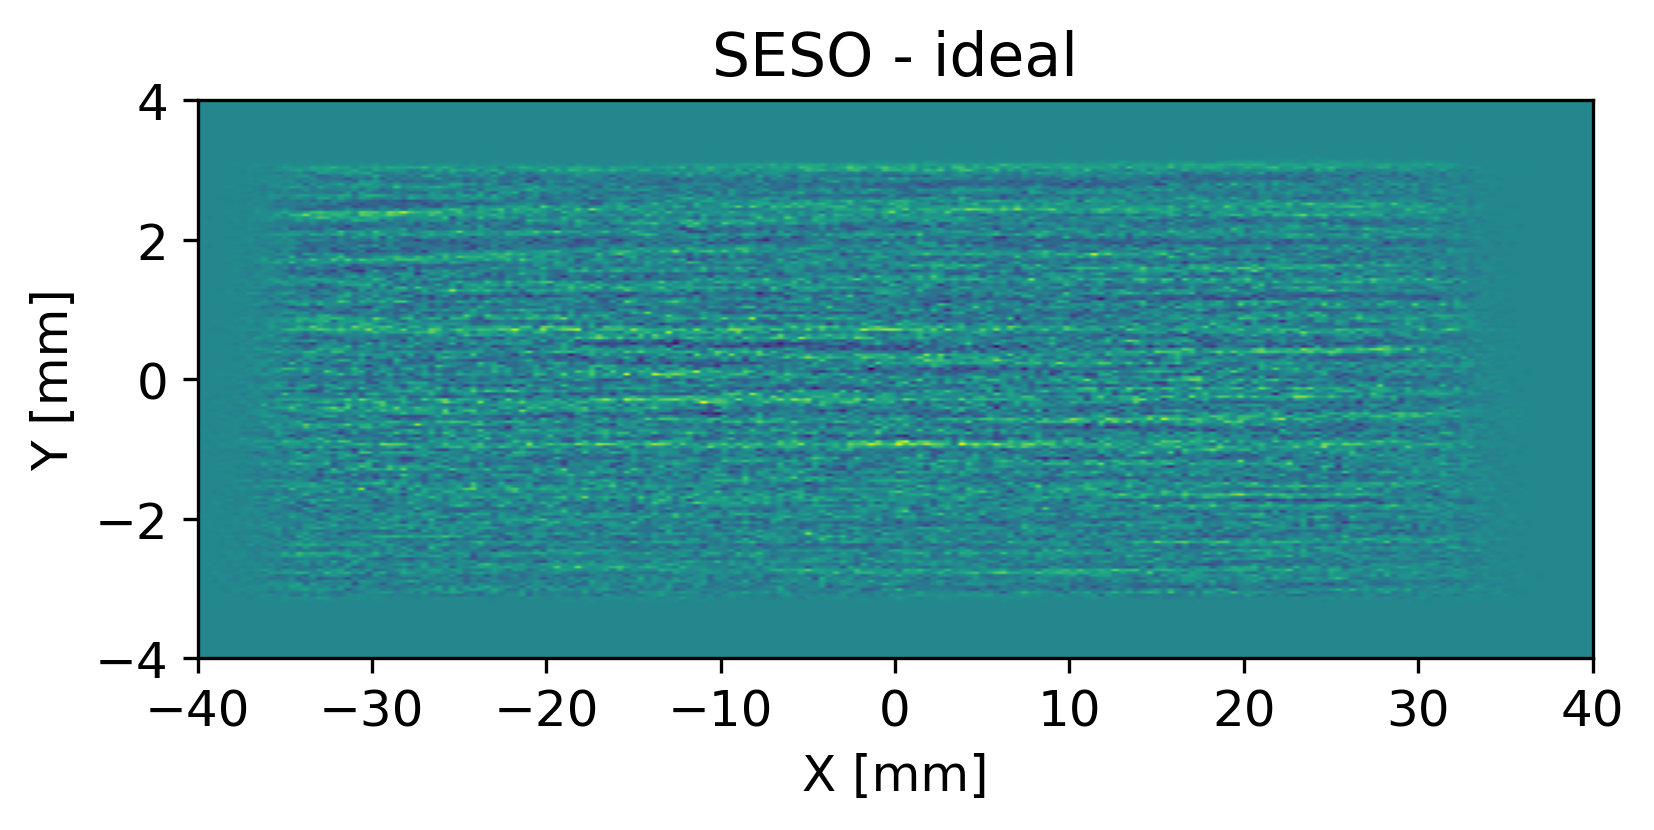

In [90]:
f, ax = plt.subplots()
plt.imshow(WB4C_45keV_SESO_profile["entry/data0/image"][:]-WB4C_45keV_flat_profile["entry/data0/image"][:], extent=(-40,40,-4,4), aspect=4)
plt.title("SESO - ideal")
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')